Saving 0.jpg to 0 (2).jpg
Color: Red, Location: (458, 889)
Color: Red, Location: (382, 887)
Color: Red, Location: (283, 886)
Color: Red, Location: (454, 881)
Color: Red, Location: (449, 881)
Color: Red, Location: (273, 881)
Color: Red, Location: (302, 832)
Color: Red, Location: (315, 831)
Color: Red, Location: (336, 827)
Color: Red, Location: (461, 826)
Color: Red, Location: (345, 825)
Color: Red, Location: (314, 823)
Color: Red, Location: (335, 816)
Color: Red, Location: (314, 816)
Color: Red, Location: (416, 814)
Color: Red, Location: (449, 811)
Color: Red, Location: (420, 811)
Color: Red, Location: (343, 811)
Color: Red, Location: (386, 806)
Color: Red, Location: (406, 805)
Color: Red, Location: (400, 803)
Color: Red, Location: (303, 803)
Color: Red, Location: (277, 801)
Color: Red, Location: (268, 799)
Color: Red, Location: (420, 798)
Color: Red, Location: (371, 796)
Color: Red, Location: (355, 794)
Color: Red, Location: (364, 792)
Color: Red, Location: (336, 792)
Color: Red, Locat

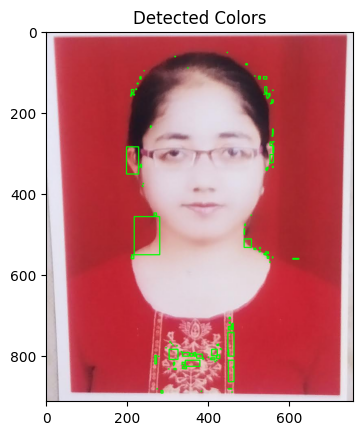

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from pathlib import Path

def is_valid_image(file_path):
    # Check if the file exists
    return cv2.imread(str(file_path)) is not None

def find_colors(image, target_colors):
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Iterate through target colors
    for color_name, color_range in target_colors.items():
        # Define the lower and upper bounds for the color range in HSV
        lower_bound = np.array(color_range[0])
        upper_bound = np.array(color_range[1])

        # Create a mask for the specified color range
        mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate through contours
        for contour in contours:
            # Get the bounding box of the contour
            x, y, w, h = cv2.boundingRect(contour)

            # Draw a rectangle around the detected color region
            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Print the color name and location
            print(f"Color: {color_name}, Location: ({x}, {y})")

    # Display the image with rectangles around detected colors using matplotlib
    plt.imshow(image_rgb)
    plt.title("Detected Colors")
    plt.show()

# Upload an image file using Google Colab's files.upload()
uploaded = files.upload()

# Get the name of the uploaded image file
image_name = list(uploaded.keys())[0]

# Save the uploaded file
uploaded_file_path = Path(image_name)
uploaded_file_path.write_bytes(uploaded[image_name])

# Check if the file is valid and read the selected image file
if is_valid_image(uploaded_file_path):
    image = cv2.imread(str(uploaded_file_path))

    # Example target colors
    target_colors = {
        "Red": ([0, 100, 100], [10, 255, 255]),
        "Blue": ([110, 50, 50], [130, 255, 255]),
        "Green": ([50, 50, 50], [70, 255, 255]),


        }

    # Call the function with the user-provided image
    find_colors(image, target_colors)
else:
    print("No valid file provided. Exiting.")


In [20]:
pip install easygui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 2.6 MB/s eta 0:00:00
